<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#Loading-the-data-and-formatting-the-variables-correctly" data-toc-modified-id="Loading-the-data-and-formatting-the-variables-correctly-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading the data and formatting the variables correctly</a></span></li><li><span><a href="#Strategy" data-toc-modified-id="Strategy-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Strategy</a></span></li><li><span><a href="#Exploring-the-variables" data-toc-modified-id="Exploring-the-variables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exploring the variables</a></span><ul class="toc-item"><li><span><a href="#Numeric-variables" data-toc-modified-id="Numeric-variables-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Numeric variables</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Categorical variables</a></span></li></ul></li><li><span><a href="#Examing-the-missing-values-and-dropping-columns" data-toc-modified-id="Examing-the-missing-values-and-dropping-columns-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Examing the missing values and dropping columns</a></span></li><li><span><a href="#Handling-missing-values" data-toc-modified-id="Handling-missing-values-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Handling missing values</a></span></li><li><span><a href="#Exploring-the-correlation-between-variables" data-toc-modified-id="Exploring-the-correlation-between-variables-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Exploring the correlation between variables</a></span></li><li><span><a href="#Exploration-of-correlation-with-target-variable" data-toc-modified-id="Exploration-of-correlation-with-target-variable-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Exploration of correlation with target variable</a></span><ul class="toc-item"><li><span><a href="#We-look-at-the-categorical-variables" data-toc-modified-id="We-look-at-the-categorical-variables-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>We look at the categorical variables</a></span></li></ul></li><li><span><a href="#Correlation-with-target-for-numerical-features" data-toc-modified-id="Correlation-with-target-for-numerical-features-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Correlation with target for numerical features</a></span></li></ul></li><li><span><a href="#Regression" data-toc-modified-id="Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regression</a></span><ul class="toc-item"><li><span><a href="#Splitting-in-train-and-testset" data-toc-modified-id="Splitting-in-train-and-testset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Splitting in train and testset</a></span></li><li><span><a href="#Different-regression-model" data-toc-modified-id="Different-regression-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Different regression model</a></span></li><li><span><a href="#Performance-on-the-testset" data-toc-modified-id="Performance-on-the-testset-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Performance on the testset</a></span></li><li><span><a href="#Different-random-forest" data-toc-modified-id="Different-random-forest-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Different random forest</a></span></li></ul></li></ul></div>

# Data exploration

## Loading the data and formatting the variables correctly

In [1]:
#libraries for exploration
import pandas as pd
#pandas settings
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_info_columns", 150)
    


import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, Imputer, Normalizer
from scipy import stats

# plotting missing values
import missingno as msno

#plotting inline matplotlib
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression, ElasticNet

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import operator

#Visualisation of models
from yellowbrick.features import FeatureImportances
from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.regressor.alphas import AlphaSelection

We load the data as a pandas dataframe and exampine the different features.

In [2]:
mood = pd.read_csv("../Data/dataset_mood_smartphone.csv")

This is a temporal dataset without many features at first sight, however to use it in a predictive model we want to transform it. We can see that for every patient at different times different variables are logged, such as call activity, arousal, etc.

In [3]:
mood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376912 entries, 0 to 376911
Data columns (total 5 columns):
Unnamed: 0    376912 non-null int64
id            376912 non-null object
time          376912 non-null object
variable      376912 non-null object
value         376710 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.4+ MB


We convert the time into actual pandas datetime format and also split date and time in different columns to help us further aggregate per time or per day.

In [4]:
from datetime import datetime
mood["time"] = mood["time"].apply(lambda x: \
    datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f"))

In [5]:
mood.head(5)

Unnamed: 0       id                time variable  value
0           1  AS14.01 2014-02-26 13:00:00     mood    6.0
1           2  AS14.01 2014-02-26 15:00:00     mood    6.0
2           3  AS14.01 2014-02-26 18:00:00     mood    6.0
3           4  AS14.01 2014-02-26 21:00:00     mood    7.0
4           5  AS14.01 2014-02-27 09:00:00     mood    6.0

We check the size of the data

In [6]:
mood.shape

(376912, 5)

In [7]:
mood.id.nunique()

27

In [8]:
mood.variable.unique()

array(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather'],
      dtype=object)

In [9]:
mood.isnull().sum().sort_values(ascending = False)

value         202
variable        0
time            0
id              0
Unnamed: 0      0
dtype: int64

From information on the dataset we know that the target variable is calculated by population and sum of murder, rape, robbery, and assault. However for most of those the rapes data is missing. This would lead to wrong imputation so we decide to drop those rows.

In [10]:
mood[mood.value.isnull()].variable.unique()

array(['circumplex.arousal', 'circumplex.valence'], dtype=object)

In [11]:
new_dates, new_times = zip(*[(d.date(), d.hour) for d in mood['time']])
mood = mood.assign(new_date=new_dates, new_time=new_times)

Since for all the remaining ones the assaults data is missing we decide to drop all rows where violentPerPop is missing

In [12]:
mood.head()

Unnamed: 0       id                time variable  value    new_date  \
0           1  AS14.01 2014-02-26 13:00:00     mood    6.0  2014-02-26   
1           2  AS14.01 2014-02-26 15:00:00     mood    6.0  2014-02-26   
2           3  AS14.01 2014-02-26 18:00:00     mood    6.0  2014-02-26   
3           4  AS14.01 2014-02-26 21:00:00     mood    7.0  2014-02-26   
4           5  AS14.01 2014-02-27 09:00:00     mood    6.0  2014-02-27   

   new_time  
0        13  
1        15  
2        18  
3        21  
4         9

In [13]:
mood[mood.variable=='screen']

Unnamed: 0       id                    time variable     value  \
39892        39893  AS14.01 2014-03-20 23:14:58.200   screen    58.846   
39893        39894  AS14.01 2014-03-20 23:17:23.092   screen     9.217   
39894        39895  AS14.01 2014-03-20 23:20:43.698   screen    19.829   
39895        39896  AS14.01 2014-03-20 23:22:05.476   screen   483.510   
39896        39897  AS14.01 2014-03-20 23:31:08.088   screen   812.907   
39897        39898  AS14.01 2014-03-20 23:45:31.217   screen    25.123   
39898        39899  AS14.01 2014-03-20 23:48:14.392   screen    15.828   
39899        39900  AS14.01 2014-03-20 23:48:32.744   screen   201.687   
39900        39901  AS14.01 2014-03-20 23:52:10.180   screen   648.997   
39901        39902  AS14.01 2014-03-21 00:10:43.749   screen    11.963   
39902        39903  AS14.01 2014-03-21 02:12:22.811   screen    19.136   
39903        39904  AS14.01 2014-03-21 02:59:55.012   screen    15.218   
39904        39905  AS14.01 2014-03-21 03:12:27.441   screen   374.379   
39905        39906  AS14.01 2014-03-21 03:19:51.420   screen     9.126   
39906        39907  AS14.01 2014-03-21 03:20:10.997   screen  1923.640   
39907        39908  AS14.01 2014-03-21 08:00:02.102   screen   142.660   
39908        39909  AS14.01 2014-03-21 08:02:26.538   screen    21.277   
39909        39910  AS14.01 2014-03-21 09:00:02.013   screen    18.527   
39910        39911  AS14.01 2014-03-21 09:10:01.789   screen    15.711   
39911        39912  AS14.01 2014-03-21 09:20:01.924   screen    13.792   
39912        39913  AS14.01 2014-03-21 09:30:02.552   screen    14.347   
39913        39914  AS14.01 2014-03-21 09:40:02.309   screen    16.034   
39914        39915  AS14.01 2014-03-21 09:50:01.897   screen  1120.479   
39915        39916  AS14.01 2014-03-21 10:10:03.170   screen  1967.283   
39916        39917  AS14.01 2014-03-21 10:43:00.954   screen     2.824   
39917        39918  AS14.01 2014-03-21 10:45:39.029   screen  1071.976   
39918        39919  AS14.01 2014-03-21 11:03:35.437   screen    10.740   
39919        39920  AS14.01 2014-03-21 11:03:47.973   screen   595.003   
39920        39921  AS14.01 2014-03-21 11:16:04.178   screen   282.394   
39921        39922  AS14.01 2014-03-21 11:21:41.190   screen    54.695   
...            ...      ...                     ...      ...       ...   
136440      136441  AS14.33 2014-05-30 15:39:43.897   screen   103.938   
136441      136442  AS14.33 2014-05-30 15:43:43.230   screen     4.063   
136442      136443  AS14.33 2014-05-30 15:43:56.684   screen   151.346   
136443      136444  AS14.33 2014-05-30 15:51:49.285   screen    41.909   
136444      136445  AS14.33 2014-05-30 15:54:48.184   screen    34.577   
136445      136446  AS14.33 2014-05-30 15:55:50.736   screen    77.821   
136446      136447  AS14.33 2014-05-30 15:58:52.773   screen    24.104   
136447      136448  AS14.33 2014-05-30 16:00:14.667   screen    11.191   
136448      136449  AS14.33 2014-05-30 16:03:27.063   screen    83.218   
136449      136450  AS14.33 2014-05-30 16:20:21.138   screen     5.703   
136450      136451  AS14.33 2014-05-30 16:21:59.141   screen    33.662   
136451      136452  AS14.33 2014-05-30 16:22:54.483   screen     9.398   
136452      136453  AS14.33 2014-05-30 19:55:58.273   screen    22.573   
136453      136454  AS14.33 2014-05-30 20:03:17.361   screen     5.008   
136454      136455  AS14.33 2014-05-30 20:05:37.832   screen   350.228   
136455      136456  AS14.33 2014-05-30 20:17:34.265   screen    61.683   
136456      136457  AS14.33 2014-05-30 20:45:55.023   screen    14.528   
136457      136458  AS14.33 2014-05-30 20:48:28.243   screen   516.619   
136458      136459  AS14.33 2014-05-30 20:59:08.757   screen   153.815   
136459      136460  AS14.33 2014-05-30 21:17:40.377   screen   216.134   
136460      136461  AS14.33 2014-05-30 21:21:52.171   screen     4.851   
136461      136462  AS14.33 2014-05-30 21:21:58.575   screen   134.948   
136462      

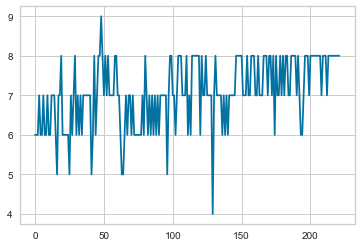

In [14]:
mood[(mood.variable=='mood') & (mood.id=='AS14.01')].value.plot()

## Strategy

We will try for different lengths of period an aggregation of all variables. The aggregation type depends on the variable.

- mood: average of the previous period
- arousal: average of the previous period
- valence: average of the previous period
- activity: average of the previous period
- screen: total screen activity so the sum
- call: number of calls made so the sum
- sms: number of sms so the sum
- for all apps: total duration so the sum


For variables related to duration it seems logical to take the total time for the previous day (or previous days depending on the window). However, it might also be that the screen time before bed impacts the mood the next day.

We define a method to preprocess the data, this includes:
- pivoting the variables so that we get a feature per variable
- aggregating per day
- taking moving averages or sum on a defined backwards period
- define the new target variable as the average mood over the day

**We create a dictionary for aggregation and for windowing so that we can play with the windows later**

In [17]:
agg_columns = list(mood.variable.unique())
agg_columns

['mood',
 'circumplex.arousal',
 'circumplex.valence',
 'activity',
 'screen',
 'call',
 'sms',
 'appCat.builtin',
 'appCat.communication',
 'appCat.entertainment',
 'appCat.finance',
 'appCat.game',
 'appCat.office',
 'appCat.other',
 'appCat.social',
 'appCat.travel',
 'appCat.unknown',
 'appCat.utilities',
 'appCat.weather']

To start we take sum for the durations and median for the ordinal values.

In [51]:
agg_dict = {}
for x in agg_columns:
    if x in ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity']:
        agg_dict.update({x: np.median})
    else: agg_dict.update({x:np.sum})
agg_dict

{'activity': <function numpy.lib.function_base.median>,
 'appCat.builtin': <function numpy.core.fromnumeric.sum>,
 'appCat.communication': <function numpy.core.fromnumeric.sum>,
 'appCat.entertainment': <function numpy.core.fromnumeric.sum>,
 'appCat.finance': <function numpy.core.fromnumeric.sum>,
 'appCat.game': <function numpy.core.fromnumeric.sum>,
 'appCat.office': <function numpy.core.fromnumeric.sum>,
 'appCat.other': <function numpy.core.fromnumeric.sum>,
 'appCat.social': <function numpy.core.fromnumeric.sum>,
 'appCat.travel': <function numpy.core.fromnumeric.sum>,
 'appCat.unknown': <function numpy.core.fromnumeric.sum>,
 'appCat.utilities': <function numpy.core.fromnumeric.sum>,
 'appCat.weather': <function numpy.core.fromnumeric.sum>,
 'call': <function numpy.core.fromnumeric.sum>,
 'circumplex.arousal': <function numpy.lib.function_base.median>,
 'circumplex.valence': <function numpy.lib.function_base.median>,
 'mood': <function numpy.lib.function_base.median>,
 'screen':

Lag is 5 days for the ordinal values and 1 for the duration. 

In [48]:
window_dict = {}
for x in agg_columns:
    if x in ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity']:
        window_dict.update({x: 5})
    else: window_dict.update({x:1})
window_dict

{'activity': 5,
 'appCat.builtin': 1,
 'appCat.communication': 1,
 'appCat.entertainment': 1,
 'appCat.finance': 1,
 'appCat.game': 1,
 'appCat.office': 1,
 'appCat.other': 1,
 'appCat.social': 1,
 'appCat.travel': 1,
 'appCat.unknown': 1,
 'appCat.utilities': 1,
 'appCat.weather': 1,
 'call': 1,
 'circumplex.arousal': 5,
 'circumplex.valence': 5,
 'mood': 5,
 'screen': 1,
 'sms': 1}

In [44]:
def aggregate_time_data(dataframe, list_of_deltas, list_of_aggregations):    
    # first pivot the variables so that we get one record per datetime and patient (get out time?)
    pivot_df= dataframe.pivot_table(values='value', index=['id', 'new_date', 'new_time'], \
                                    columns='variable')
    #DO NOT FILL NAN so that pandas only counts the nonzero ones in the means
    #pivot_df.fillna(0, inplace=True)
    #aggregate per day depending on the aggregation type
    daily_df = pivot_df.groupby(['id', 'new_date']).agg(list_of_aggregations)
    #Make mood the target variable
    #daily_df.['target'] = daily_df['mood']
    # shift the other variables 1 day to create new target and take only the previous days into account
    daily_df_shift = daily_df.groupby(['id'])[list(list_of_aggregations.keys())].shift(1)
    #add the target variable (unshifted)
    daily_df_shift['target'] = daily_df['mood']
    #window with the deltas and necessary aggregations
    df_rolling = daily_df_shift
    for x in list_of_deltas.keys():
        df_rolling[x] = daily_df_shift[x].rolling(list_of_deltas.get(x)).agg(list_of_aggregations.get(x))   
    return df_rolling.reset_index(level=['id', 'new_date'])  

In [52]:
prepped_mood = aggregate_time_data(mood, window_dict, agg_dict)

In [53]:
prepped_mood

id    new_date  activity  appCat.builtin  appCat.communication  \
0     AS14.01  2014-02-17       NaN             NaN                   NaN   
1     AS14.01  2014-02-18       NaN        0.000000          0.000000e+00   
2     AS14.01  2014-02-19       NaN        0.000000          0.000000e+00   
3     AS14.01  2014-02-20       NaN        0.000000          0.000000e+00   
4     AS14.01  2014-02-21       NaN        0.000000          0.000000e+00   
5     AS14.01  2014-02-22       NaN        0.000000          0.000000e+00   
6     AS14.01  2014-02-25       NaN        0.000000          0.000000e+00   
7     AS14.01  2014-02-26       NaN        0.000000          0.000000e+00   
8     AS14.01  2014-02-27       NaN        0.000000          0.000000e+00   
9     AS14.01  2014-02-28       NaN        0.000000          0.000000e+00   
10    AS14.01  2014-03-01       NaN        0.000000          0.000000e+00   
11    AS14.01  2014-03-03       NaN        0.000000          0.000000e+00   
12    AS14.01  2014-03-05       NaN        0.000000          0.000000e+00   
13    AS14.01  2014-03-06       NaN        0.000000          0.000000e+00   
14    AS14.01  2014-03-07       NaN        0.000000          0.000000e+00   
15    AS14.01  2014-03-10       NaN        0.000000          0.000000e+00   
16    AS14.01  2014-03-11       NaN        0.000000          0.000000e+00   
17    AS14.01  2014-03-12       NaN        0.000000          0.000000e+00   
18    AS14.01  2014-03-13       NaN        0.000000          0.000000e+00   
19    AS14.01  2014-03-14       NaN        0.000000          0.000000e+00   
20    AS14.01  2014-03-15       NaN        0.000000          0.000000e+00   
21    AS14.01  2014-03-16       NaN        0.000000          0.000000e+00   
22    AS14.01  2014-03-17       NaN        0.000000          0.000000e+00   
23    AS14.01  2014-03-18       NaN        0.000000          0.000000e+00   
24    AS14.01  2014-03-19       NaN        0.000000          0.000000e+00   
25    AS14.01  2014-03-20       NaN        0.000000          0.000000e+00   
26    AS14.01  2014-03-21       NaN       11.044733          1.048686e+02   
27    AS14.01  2014-03-22       NaN      230.019006          7.630794e+02   
28    AS14.01  2014-03-23       NaN      138.338687          8.827797e+02   
29    AS14.01  2014-03-24       NaN      145.124771          7.469574e+02   
...       ...         ...       ...             ...                   ...   
1943  AS14.33  2014-05-02  0.042373      210.450157          4.658979e+02   
1944  AS14.33  2014-05-03  0.050634      113.478641          1.818989e-12   
1945  AS14.33  2014-05-04  0.069047     5719.294892          6.690150e+01   
1946  AS14.33  2014-05-05  0.233125      377.533148          1.785213e+02   
1947  AS14.33  2014-05-06  0.233125      369.215138          2.596481e+02   
1948  AS14.33  2014-05-07  0.233125      111.209082          1.420153e+03   
1949  AS14.33  2014-05-08  0.029627       88.493922          7.083000e+00   
1950  AS14.33  2014-05-09  0.029627      222.182142          5.783373e+02   
1951  AS14.33  2014-05-10  0.004167      196.873689          2.644703e+02   
1952  AS14.33  2014-05-11  0.004167      171.283184          2.283833e+02   
1953  AS14.33  2014-05-12  0.000000       61.992392          1.889783e+02   
1954  AS14.33  2014-05-13  0.000000      226.039584          5.897148e+02   
1955  AS14.33  2014-05-14  0.000000      237.356891          8.515757e+02   
1956  AS14.33  2014-05-15  0.000000      104.951624          7.526917e+01   
1957  AS14.33  2014-05-16  0.000000      155.052429          5.107164e+02   
1958  AS14.33  2014-05-17  0.000000      137.391664          1.170399e+02   
1959  AS14.33  2014-05-18  0.000000      136.938284          2.617982e+02   
1960  AS14.33  2014-05-19  0.000000      278.713005          4.845828e+02   
1961  AS14.33  2014-05-20  0.000000       80.568048          1.878061e+02   
1962  AS14.33  2014-05-21  0.000000       97.908935          3.331647e+02   
1963  A

drop the rows with target nan

In [61]:
prepped_mood = prepped_mood[~np.isnan(prepped_mood.target)]

In [62]:
prepped_mood[np.isnan(prepped_mood.mood)]

id    new_date  activity  appCat.builtin  appCat.communication  \
7     AS14.01  2014-02-26       NaN    0.000000e+00          0.000000e+00   
8     AS14.01  2014-02-27       NaN    0.000000e+00          0.000000e+00   
26    AS14.01  2014-03-21       NaN    1.104473e+01          1.048686e+02   
27    AS14.01  2014-03-22       NaN    2.300190e+02          7.630794e+02   
28    AS14.01  2014-03-23       NaN    1.383387e+02          8.827797e+02   
29    AS14.01  2014-03-24       NaN    1.451248e+02          7.469574e+02   
30    AS14.01  2014-03-25  0.081548    8.461130e+01          6.988552e+02   
99    AS14.02  2014-03-16       NaN    1.661794e+02          2.857761e+02   
100   AS14.02  2014-03-17       NaN    6.762831e+02          5.498452e+02   
101   AS14.02  2014-03-18       NaN    1.040293e+02          5.811051e+02   
102   AS14.02  2014-03-19       NaN    1.089603e+03          3.814166e+02   
103   AS14.02  2014-03-20       NaN    1.464572e+02          3.558356e+02   
168   AS14.03  2014-03-21       NaN    4.991563e-13          5.115908e-13   
169   AS14.03  2014-03-22       NaN    5.359350e+01          3.960336e+02   
170   AS14.03  2014-03-23       NaN    1.902464e+02          1.468356e+02   
171   AS14.03  2014-03-24       NaN    1.568723e+02          3.041224e+02   
172   AS14.03  2014-03-25       NaN    3.775125e+01          2.976760e+02   
215   AS14.03  2014-05-07  0.021972    1.934831e+02          2.091614e+02   
234   AS14.05  2014-03-14       NaN    1.023182e-12          4.263256e-13   
235   AS14.05  2014-03-15       NaN    1.826892e+02          5.469130e+02   
236   AS14.05  2014-03-16       NaN    2.899482e+02          9.429502e+02   
237   AS14.05  2014-03-17       NaN    9.268540e+01          8.762076e+02   
238   AS14.05  2014-03-18       NaN    1.625980e+02          4.742121e+02   
315   AS14.06  2014-03-24       NaN    8.952838e-13          5.684342e-13   
316   AS14.06  2014-03-25       NaN    3.789450e+01          2.548519e+02   
317   AS14.06  2014-03-26       NaN    1.168870e+02          9.525189e+02   
318   AS14.06  2014-03-27       NaN    7.490800e+01          4.580754e+02   
319   AS14.06  2014-03-28       NaN    2.978070e+02          6.853626e+02   
359   AS14.06  2014-05-07  0.087500    1.693202e+02          7.995872e+02   
360   AS14.06  2014-05-08  0.070833    4.162565e+02          7.668598e+02   
...       ...         ...       ...             ...                   ...   
1829  AS14.32  2014-04-02       NaN    1.059268e+02          2.311910e+02   
1830  AS14.32  2014-04-03       NaN    1.685098e+02          3.215320e+02   
1831  AS14.32  2014-04-04       NaN    1.097855e+02          5.455413e+02   
1832  AS14.32  2014-04-05       NaN    1.815120e+02          5.537642e+02   
1848  AS14.32  2014-04-21  0.000000    1.347355e+02          8.205274e+02   
1850  AS14.32  2014-04-23  0.000000    1.958219e+02          7.132208e+02   
1851  AS14.32  2014-04-24  0.000000    1.964110e+02          7.285142e+02   
1852  AS14.32  2014-04-25  0.000000    1.807531e+02          6.076222e+02   
1854  AS14.32  2014-04-27  0.029167   -1.136868e-13          4.003520e+02   
1855  AS14.32  2014-04-28  0.012787    5.435375e+02          3.605420e+02   
1856  AS14.32  2014-04-29  0.000000    4.351478e+02          7.810454e+02   
1857  AS14.32  2014-04-30  0.008772    2.111317e+01          5.892348e+02   
1858  AS14.32  2014-05-01  0.000000    1.325463e+02          6.889720e+02   
1864  AS14.32  2014-05-07  0.004310    8.304253e+01          1.011175e+03   
1865  AS14.32  2014-05-08  0.004310    1.538716e+02          8.389656e+02   
1866  AS14.32  2014-05-09  0.008265    3.940306e+02          8.651597e+02   
1867  AS14.32  2014-05-10  0.008265    2.032098e+02          4.799829e+02   
1868  AS14.32  2014-05-11  0.021998    9.280654e+01          7.777781e+02   
1927  AS14.33  2014-04-16       NaN    0.000000e+00          1.477929e-12   
1928  AS14.33  2014-04-17       NaN    6.662119e+01          3.533627e+02   
1929  A

In [ ]:
daily_mood[['target']] = daily_mood[[ 'mood']]

In [ ]:
daily_mood

In [ ]:
daily_mood_shift = daily_mood.groupby(['id'])[list(agg_colums)].shift(1)
daily_mood_shift[['target']]= daily_mood[['target']]

In [ ]:
daily_mood_shift

In [ ]:
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

We can now drop all specific crimes. As we read they are all summing up to the violentPerPop. In fact they could be target variables themselves, not predictors.

We also drop the column indicating the number of non violent crimes as we only want to perdict the violent ones on the basis of socio economic variables.

In [ ]:
crimes = crimes.drop(axis=1, columns = crime_types.columns)
crimes = crimes.drop(axis=1, columns=["nonViolPerPop"])

In [ ]:
crimes.columns.values

## Exploring the variables

We perform some basic data analysis on the different variables. Let's first look at the statistics of the numeric variables. 

In [ ]:
mood.describe()

Most columns are numeric:

In [ ]:
crimes.dtypes.value_counts()

In [ ]:
crimes.communityname[~crimes.communityname.str.contains("city|township|borough|town|village|district|division")]

We split of the type of community as that might be an important feature

In [ ]:
import re
def findCommunityType(community):
    match = re.search("city|township|borough|town|village|district|division", community)
    if match:
        title = match.group(0)
        return title
    else:
        return "Other"

crimes["communityType"] = crimes["communityname"].apply(findCommunityType)

crimes["communityType"].value_counts()

Now we want to split of the communitytype from the communityname to clean it up.

In [ ]:
crimes.communityname = crimes.communityname.replace(crimes.communityType[crimes.communityType.notnull()], '', regex = True).str.strip()

We drop the communityname

In [ ]:
crimes.drop(columns=["communityname"], axis = 1, inplace=True)

We split the features in types

In [ ]:
nominal_features = crimes.select_dtypes(include='O').columns.tolist()
numerical_features = crimes.select_dtypes(include=np.number).columns.tolist()
target = "ViolentPerPop"

In [ ]:
nominal_features

In [ ]:
crimes.describe(include=['O'])

In [ ]:
crimes.describe(include=[np.float])

In [ ]:
numerical_features

### Numeric variables

We make histograms and boxplots of the different numerical columns. 

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
import plotly.figure_factory as ff

app = dash.Dash()

available_indicators = crimes.columns


app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='xaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                #value='Fertility rate, total (births per woman)'
            ),
            dcc.RadioItems(
                id='xaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            ),
            
            dcc.Graph(id='histograms')
        ],
        style={'width': '48%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                #value='Life expectancy at birth, total (years)'
            ),
            dcc.RadioItems(
                id='yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            ),
            dcc.Graph(id='boxplots')
            
        ],style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
    ]),
    
    

#    dcc.Slider(
 #       id='year--slider',
  #      min=df['Year'].min(),
   #     max=df['Year'].max(),
    #    value=df['Year'].max(),
     #   step=None,
      #  marks={str(year): str(year) for year in df['Year'].unique()}
   # )
])

@app.callback(
    dash.dependencies.Output('histograms', 'figure'),
    [dash.dependencies.Input('xaxis-column', 'value'),
     dash.dependencies.Input('xaxis-type', 'value'),
     ])
def update_graph(xaxis_column_name,
                 xaxis_type):
    #dff = df[df['Year'] == year_value]

    return {
        'data': [go.Histogram(
            x=crimes[xaxis_column_name]
            #text=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
        )],
        'layout': go.Layout(
            xaxis={
                'title': xaxis_column_name,
                'type': 'linear' if xaxis_type == 'Linear' else 'log'
            },
            margin={'l': 40, 'b': 40, 't': 10, 'r': 0},
            hovermode='closest'
        )
    }

@app.callback(
    dash.dependencies.Output('boxplots', 'figure'),
    [dash.dependencies.Input('yaxis-column', 'value'),
    dash.dependencies.Input('yaxis-type', 'value')])


def update_boxplots(yaxis_column_name,
                 yaxis_type):
    #dff = df[df['Year'] == year_value]

     return {
        'data': [go.Box(
            y=crimes[yaxis_column_name]
            #text=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
        )],
        'layout': go.Layout(
            yaxis={
                'title': yaxis_column_name,
                'type': 'linear' if yaxis_type == 'Linear' else 'log'
            },
            margin={'l': 40, 'b': 40, 't': 10, 'r': 0},
            hovermode='closest'
        )
    }
        
    

if __name__ == '__main__':
    app.run_server()

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
import plotly.figure_factory as ff

app = dash.Dash()

available_indicators = crimes.columns


app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='xaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                #value='Fertility rate, total (births per woman)'
            ),
            dcc.RadioItems(
                id='xaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],
        style={'width': '48%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                #value='Life expectancy at birth, total (years)'
            ),
            dcc.RadioItems(
                id='yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
    ]),

    dcc.Graph(id='indicator-graphic'),
    dcc.Graph(id='distributions')

#    dcc.Slider(
 #       id='year--slider',
  #      min=df['Year'].min(),
   #     max=df['Year'].max(),
    #    value=df['Year'].max(),
     #   step=None,
      #  marks={str(year): str(year) for year in df['Year'].unique()}
   # )
])

@app.callback(
    dash.dependencies.Output('indicator-graphic', 'figure'),
    [dash.dependencies.Input('xaxis-column', 'value'),
     dash.dependencies.Input('yaxis-column', 'value'),
     dash.dependencies.Input('xaxis-type', 'value'),
     dash.dependencies.Input('yaxis-type', 'value')])
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type):
    #dff = df[df['Year'] == year_value]

    return {
        'data': [go.Scatter(
            x=crimes[xaxis_column_name],
            y=crimes[yaxis_column_name],
            #text=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
            mode='markers',
            marker={
                'size': 15,
                'opacity': 0.5,
                'line': {'width': 0.5, 'color': 'black'}
            }
        )],
        'layout': go.Layout(
            xaxis={
                'title': xaxis_column_name,
                'type': 'linear' if xaxis_type == 'Linear' else 'log'
            },
            yaxis={
                'title': yaxis_column_name,
                'type': 'linear' if yaxis_type == 'Linear' else 'log'
            },
            margin={'l': 40, 'b': 40, 't': 10, 'r': 0},
            hovermode='closest'
        )
    }

@app.callback(
    dash.dependencies.Output('distributions', 'figure'),
    [dash.dependencies.Input('xaxis-column', 'value'),
    dash.dependencies.Input('xaxis-type', 'value')])


def update_distributions(xaxis_column_name,
                 xaxis_type):
    #dff = df[df['Year'] == year_value]

    return ff.create_distplot(
            hist_data = [crimes[xaxis_column_name]],
            group_labels = [crimes.columns],
            rug_text=xaxis_column_name,
            
        )
        
    

if __name__ == '__main__':
    app.run_server()

**Distributions** most variables seem to have exponential or log distribution, not normal. We will have to scale them to perform better in the models

In [ ]:


### Plotting Numeric Features
# Looping through and Plotting Numeric features

for column in crimes.select_dtypes(exclude=['object']).columns:   
    
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    ### Distribution plot
    sns.distplot(crimes[column].dropna(), ax=plt.subplot(221));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density', fontsize=14);
    ### Boxplot
    sns.boxplot(crimes[column].dropna(), ax=plt.subplot(222));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel("Box", fontsize=14)
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for ' + column, fontsize=18);
 
# Printing Chart
plt.show()

    

### Categorical variables

We make a simple countplot for each variable to see how the records are distributed over the different categories. We see for instance that most places are cities. There are way too many community names to be useful. We see that the data is not sampled evenly over states and over community types (way more data point from cities).

In [ ]:
### Plotting categorical Features
# Looping through and Plotting categorical features


for column in nominal_features:   
    
    # Figure initiation
    fig = plt.figure(figsize=(10,6))
    ### Distribution plot
    sns.countplot(crimes[column].dropna());
    # X-axis Label
    plt.xlabel(column, fontsize=14);
   # Adding Super Title (One for a whole figure)
    plt.suptitle('Count class size for ' + column, fontsize=18);
 
# Printing Chart
plt.show()

## Examing the missing values and dropping columns

We use the missing_no package to visualise the missing values. We see that some columns have too much missing values to be useful.

In [ ]:
msno.matrix(crimes)
plt.show()

In [ ]:
#percentage nulls per column
missing_perc = (crimes.isnull().sum()/crimes.shape[0]).sort_values(ascending = False)

For the columns that have more than half of the values missing we create a new feature indicating whether it is missing or not and drop the original column.

In [ ]:
crimes_helper = crimes[missing_perc[missing_perc.values>0.5].index]

In [ ]:
crimes_helper.columns

In [ ]:
for col in crimes_helper.columns:
    crimes[col+"_missing"] = crimes[col].apply(lambda x: np.isnan(x))

In [ ]:
crimes.columns

In [ ]:
crimes.dropna(thresh = 0.5*len(crimes), axis=1, inplace=True)

In [ ]:
crimes.shape

## Handling missing values

We still have only 1 missing value left in other per cap.

In [ ]:
msno.matrix(crimes)
plt.show()

In [ ]:
#percentage nulls per column
(crimes.isnull().sum()/crimes.shape[0]).sort_values(ascending = False)

only other per cap is missing in one row. But looking at the pct black and such there are no other people than black, whitem asian and hispanic (the sum is alreayd more than hundred).

In [ ]:
crimes.filter(regex="(?i)white|black|asian|other|indian|hisp")[np.isnan(crimes.otherPerCap)]

Let's plot the wages per capita for other. We impute by the median because of the skewedness.

In [ ]:
sns.distplot(crimes.dropna().otherPerCap)
plt.axvline(crimes.dropna().otherPerCap.median(), ls='--', color ='r')
plt.axvline(crimes.dropna().otherPerCap.mean(), ls='--', color ='g')
plt.show()

In [ ]:
crimes["otherPerCap"] = crimes["otherPerCap"].transform(lambda x: x.fillna(x.median()))

In [ ]:
crimes[crimes.otherPerCap.isnull()]

No missing values are left!

In [ ]:
crimes.isnull().sum().sort_values()

## Exploring the correlation between variables

We now explore the correlation between the variables to see which ones we should consider for the models.

In [ ]:
# GETTING Correllation matrix
corr_mat=crimes.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=False,cmap='cubehelix')
plt.title("Correlation between non-class variables")
plt.show()

We want to drop features which are highly correlated:

In [ ]:
# Create correlation matrix
corr_matrix = crimes.drop(columns=['violentPerPop'], axis = 1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#select treshhold

tresh = 0.80

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > tresh)]

In [ ]:
to_drop

In [ ]:
crimes.drop(crimes[to_drop], axis=1, inplace=True)

In [ ]:
crimes.shape

In [ ]:
# GETTING Correllation matrix
corr_mat=crimes.corr(method='pearson').abs()
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=False)
plt.title("Correlation between variables")
plt.show()

## Exploration of correlation with target variable

First, our target variable seems far from normally distributed

In [ ]:
crimes.violentPerPop.plot(kind='HIST', bins = 30)

Log transform looks better

In [ ]:
sns.distplot(crimes['violentPerPop'].apply(lambda x: np.log(x+1))) #plus one to avoid log zero
plt.title("log transformed number of violent crimes")
plt.show()


Make new target variable

In [ ]:
crimes['target'] = crimes['violentPerPop'].apply(lambda x: np.log(x+1))

In [ ]:
crimes

### We look at the categorical variables

State and communityName have way too much 

In [ ]:
### Target variable exploration

facet = sns.FacetGrid(crimes , aspect=4, hue='communityType')
facet.map(sns.kdeplot,'target',shade= True)

plt.legend()
plt.title("Violent crimes per community type")
plt.show()

In [ ]:
sns.factorplot(x='communityType',y='target', hue='communityType', kind="box", data=crimes, size = 7, aspect = 2,)
#limit y axis for visibility


plt.title("violent crimes per community type")




plt.show()

We see that cities have higher violent crime rate.

## Correlation with target for numerical features

We see that the pc2par and pctWdiv have very high absolute correlation

In [ ]:
crimes.corr().abs()['target'].sort_values(ascending = False)

# Regression

## Splitting in train and testset

We use one hot encoding to convert the nominal variables.

In [ ]:
nominal_features = crimes.select_dtypes(include='O')

In [ ]:
nominal_features

In [ ]:
crimes = pd.get_dummies(crimes, columns=nominal_features)

In [ ]:
crimes.head()

## Different regression model

We have to center and scale age and fare. We hence setup an scikit-learn pipeline. We make a list of models to try:
- simple regression
- penalized regression
- Random Forest
- Neural network
- KNN
- XGBoost

We split the dataset in a test and trainset. Our testset size is 50%.

In [ ]:
number_features = 15
keep_features = crimes.corr().abs()['target'].sort_values(ascending = False)[2:2+number_features].index


In [ ]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(crimes.drop(axis=1, columns=['target', 'violentPerPop']), crimes['target'], test_size=0.5)


models=dict()
pipelines = dict()
#Logistic Regression
models.update({"LinearRegression": LinearRegression()})
models.update({"Elastic Net": ElasticNet()})   
models.update({"XGBoost": XGBRegressor()})
models.update({"Random Forest": RandomForestRegressor(n_estimators=1000,random_state=0,n_jobs=-1)})
models.update({"Gradient Boost": GradientBoostingRegressor()})
for i in range(2,40):
    models.update({"KNN" + str(i) : KNeighborsRegressor(n_neighbors=i)})
models.update({"Neural Net": MLPRegressor()})

# Compute train and test errors
train_errors = dict()
test_errors = dict()
preprocessors = [('reduce_dim', PCA()), ('scaler',StandardScaler()),('normalizer', Normalizer())]

for label, clf in models.items():
    estimators = preprocessors +  [('clf',clf )]
    pipeline = Pipeline(estimators) #standard scale
    pipelines.update({label:pipeline})
    scores = cross_val_score(
        estimator=pipeline,
        X=X_train,
        y=y_train,
        cv=10,
        scoring='neg_mean_squared_error',
    )
    pipeline.fit(X_test, y_test)
    test_errors.update({label: mean_squared_error(y_test, pipeline.predict(X_test))})
    pipeline.fit(X_train,y_train)
    r2 = r2_score(y_train, pipeline.predict(X_train))
    print("Neg MSE: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    print("r2: %0.2f [%s]" % (r2, label))
    print("test error: %0.2f" % test_errors.get(label))
    
best_model = min(test_errors.items(), key=operator.itemgetter(1))[0]
print("Best model with lowest test error : %s" % best_model)


In [ ]:
clf=models.get("KNN1")

estimators = [ ('scaler',StandardScaler()),('normalizer', Normalizer()), ('clf',clf )]
pipeline = Pipeline(estimators) #standard scale
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
pd.DataFrame(data={'predictions': y_pred, 'actual': y_train})

R squared: -167521.55 (+/- 42890.81) [LinearRegression]
test error: 205645.63
R squared: -232087.68 (+/- 62426.01) [Elastic Net]
test error: 295655.91
R squared: -148197.50 (+/- 37426.63) [XGBoost]
test error: 76787.41
R squared: -138506.75 (+/- 34178.45) [Random Forest]
test error: 25326.34
R squared: -149016.16 (+/- 34920.26) [Gradient Boost]
test error: 74549.01
R squared: -151117.59 (+/- 35133.19) [KNN]
test error: 164439.03
R squared: -348716.62 (+/- 87084.29) [Neural Net]
test error: 436115.04
Best model with lowest test error : Random Forest

In [ ]:
print(train_errors)
print(test_errors)

In [ ]:


# Instantiate the linear model and visualizer
for label, clf in models.items():
    estimators = [('reduce_dim', PCA()), ('scaler',StandardScaler()),('normalizer', Normalizer()), ('clf',clf )]
    pipeline = Pipeline(estimators) #standard scale    
    visualizer1 = PredictionError(pipeline)
    visualizer1.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer1.score(X_test, y_test)
    visualizer = ResidualsPlot(pipeline)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    g1 = visualizer.poof() # Evaluate the model on the test data
    g = visualizer.poof()             # Draw/show/poof the data

In [ ]:
from yellowbrick.features import FeatureImportances
# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()
for label, clf in models.items():
    pipeline = Pipeline([('scaler',StandardScaler()),('normalizer', Normalizer()), ('clf',clf )]) #standard scale
    viz = FeatureImportances(pipeline, ax=ax)
    viz.fit(X_train, y_train)
    viz.poof()

## Performance on the testset

We check now the performance on the testset and see that KNN does not perform very well. Random forest seems the most promising so we will tweak that.

In [ ]:
# #############################################################################
# Compute train and test errors
train_errors = list()
test_errors = list()
for label, clf in models.items():
    .fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(X, y).coef_

# #############################################################################
# Plot results functions

import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

# Show estimated coef_ vs true coef
plt.subplot(2, 1, 2)
plt.plot(coef, label='True coef')
plt.plot(coef_, label='Estimated coef')
plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()

## Different random forest

In [ ]:

rfc = RandomForestRegressor(n_jobs=-1,  oob_score = True) 
pipeline = Pipeline([('scaler',StandardScaler()),('normalizer', Normalizer()), ('clf',rfc )]) #standard scale
# Use a grid over parameters of interest
param_grid = {"clf__n_estimators":[10,100,1000],
    "clf__max_depth": [3, None],
              "clf__max_features": ["sqrt", None, "log2"],
              "clf__min_samples_split": [2, 3, 10],
              "clf__min_samples_leaf": [1, 3, 10],
              # "bootstrap": [True, False],
              #"clf__criterion": ["gini", "entropy"]
             }
#pipeline.get_params().keys()
CV_rfc = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv= 10, scoring = 'mean_squared_error')
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

In [ ]:
# #############################################################################
# Plot feature importance
clf= CV_rfc.best_estimator_.steps[2][1]
from yellowbrick.features import FeatureImportances
# Create a new matplotlib figure
fig = plt.figure(figsize=(10,20))

viz = FeatureImportances(clf,)
viz.fit(X_train, y_train)
viz.poof()

In [ ]:
# Create a list of alphas to cross-validate against
alphas = np.logspace(-12, -0.5, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
g = visualizer.poof()             # Draw/show/poof the data